In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data=pd.read_csv('King County Housing May 2014 - May 2015.csv')
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [3]:
data.head(5).T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [4]:
#get some information about our DataSet
data.info()
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
data["price"].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [6]:
print(data['price'].describe().apply(lambda x: '{:,.1f}'.format(x)))

count       21,613.0
mean       540,088.1
std        367,127.2
min         75,000.0
25%        321,950.0
50%        450,000.0
75%        645,000.0
max      7,700,000.0
Name: price, dtype: object


In [7]:
# let's drop unnecessory featurs
data = data.drop('id',axis=1)
data = data.drop('zipcode',axis=1)
data = data.drop('date',axis=1)

In [8]:
data.shape

(21613, 18)

In [9]:
# check if there are any Null values
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\

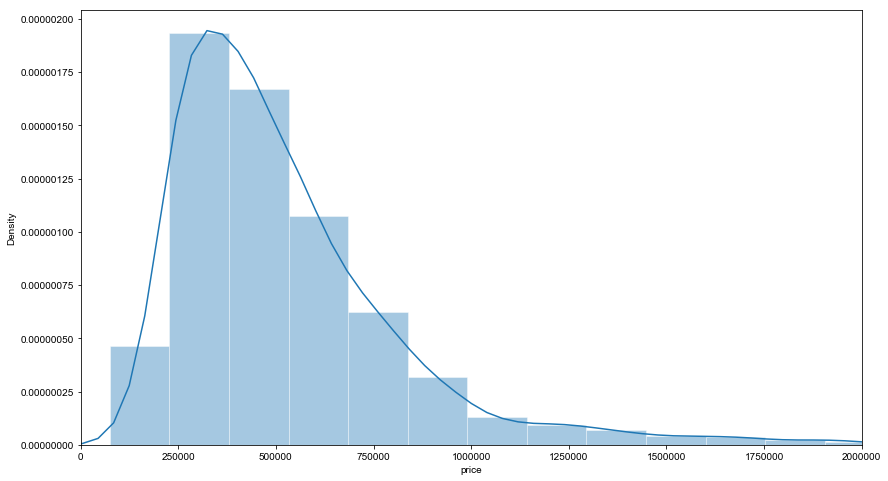

In [10]:
# Sale Price Distribution
fig, ax = plt.subplots(figsize=(14,8))
sns.set_style("whitegrid")
sns.distplot(data['price'])
plt.xlim(0,2000000)
plt.show()

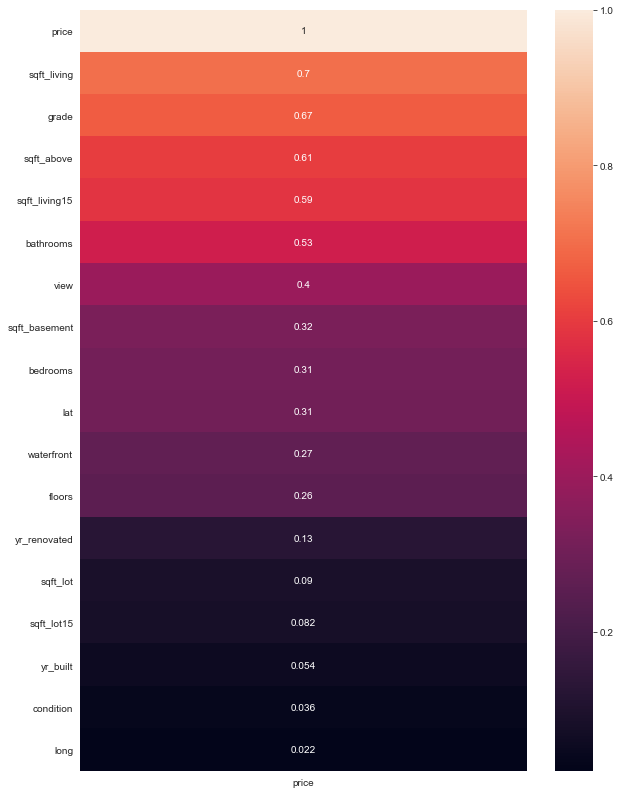

In [11]:
# Correlation to price value using heatmap
fig, ax = plt.subplots(figsize=(10,14))
price_corr = data.corr()[['price']].sort_values(
  by='price', ascending=False)
sns.heatmap(price_corr, annot=True, ax=ax) 

C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\U

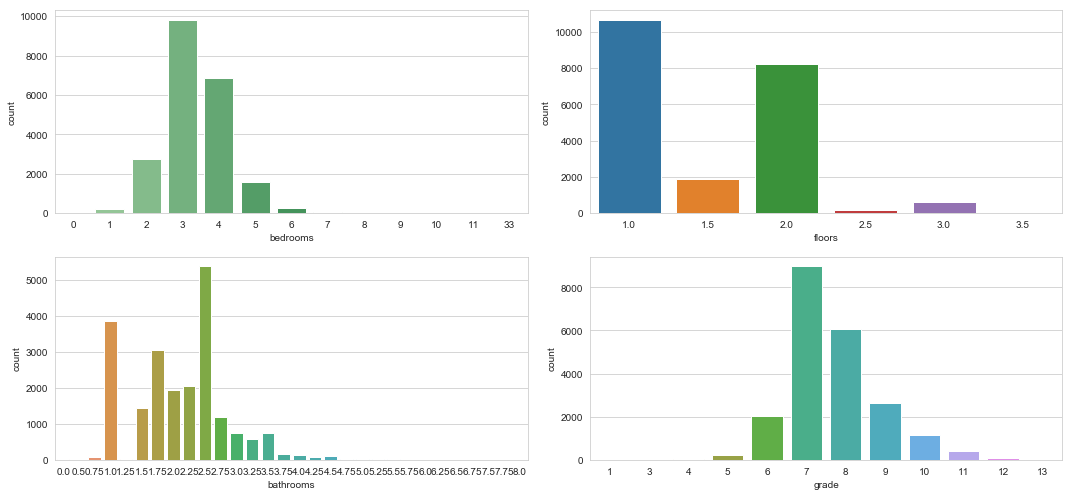

In [12]:
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(data['bedrooms'], palette = 'Greens_d')
fig.add_subplot(2,2,2)
sns.countplot(data['floors'])
fig.add_subplot(2,2,3)
sns.countplot(data['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(data['grade'])
plt.tight_layout()

C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWar

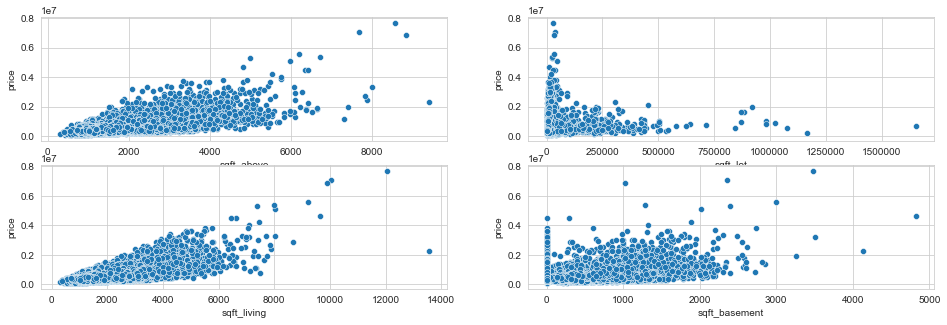

In [13]:
# sqft living and price scatter plot
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(data['sqft_above'], data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(data['sqft_lot'],data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(data['sqft_living'],data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(data['sqft_basement'],data['price'])

# Machine Learning

In [14]:
X = data.drop('price',axis =1).values
y = data['price'].values
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [15]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Method1:Linear Regression

In [46]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([-3.19737142e+04,  2.75827004e+04,  1.27223459e+18,  6.79767381e+03,
        2.66408030e+03,  5.02934741e+04,  3.71152780e+04,  2.10746157e+04,
        1.15860268e+05, -1.15048333e+18, -6.10023970e+17, -7.35068052e+04,
        7.29634876e+03,  7.78795309e+04, -1.70397036e+04,  1.88708790e+04,
       -1.05699397e+04])

In [47]:
regressor.intercept_

539843.3871507035

In [48]:
y_pred_lr = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
df_lr = df.head(10)
df_lr

,Actual,Predicted
0,349950.0,513506.912499
1,450000.0,645358.424725
2,635000.0,533840.394155
3,355500.0,326759.391325
4,246950.0,74197.464680
5,406550.0,487434.734769
6,350000.0,296472.683932
7,226500.0,278397.265336
8,265000.0,290238.381057
9,656000.0,509592.940988


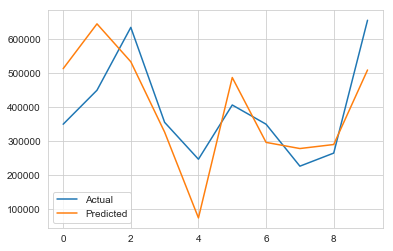

In [49]:
df_lr.plot()

In [51]:
from sklearn import metrics

print("Train Accuracy Score {:.2f} ".format(regressor.score(X_train,y_train)))
print("Test Accuracy Score {:.2f} ".format(regressor.score(X_test, y_test)))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_lr))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_lr)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))))

Train Accuracy Score 0.69 
Test Accuracy Score 0.70 
Mean Absolute Error: 126523.62
Mean Squared Error:40829932237.92
Root Mean Squared Error:202064.18


## Method2: Neural Network

In [22]:
# Creating a Neural Network Model
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


In [23]:
!pip install keras


In [24]:
# having 18 nueron is based on the number of available featurs
model = Sequential()

model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


In [25]:
#Training model
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=100,callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
114/114 [==============================] - 1s 3ms/step - loss: 434108930457.6000 - val_loss: 428818628608.0000
Epoch 2/100
114/114 [==============================] - 0s 1ms/step - loss: 417872450568.9044 - val_loss: 425161687040.0000
Epoch 3/100
114/114 [==============================] - 0s 1ms/step - loss: 426275161061.2869 - val_loss: 388509204480.0000
Epoch 4/100
114/114 [==============================] - 0s 2ms/step - loss: 357104117350.4000 - val_loss: 290274639872.0000
Epoch 5/100
114/114 [==============================] - 0s 2ms/step - loss: 262506825817.0435 - val_loss: 155861565440.0000
Epoch 6/100
114/114 [==============================] - 0s 1ms/step - loss: 146550006329.8783 - val_loss: 113439432704.0000
Epoch 7/100
114/114 [==============================] - 0s 2ms/step - loss: 111660916522.2957 - val_loss: 98043346944.0000
Epoch 8/100
114/114 [==============================] - 0s 2ms/step - loss: 101375118968.2087 - val_loss: 84677074944.0000
Epoch 9/100
114/11

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                324       
_________________________________________________________________
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_2 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_3 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 19        
Total params: 1,369
Trainable params: 1,369
Non-trainable params: 0
_________________________________________________________________


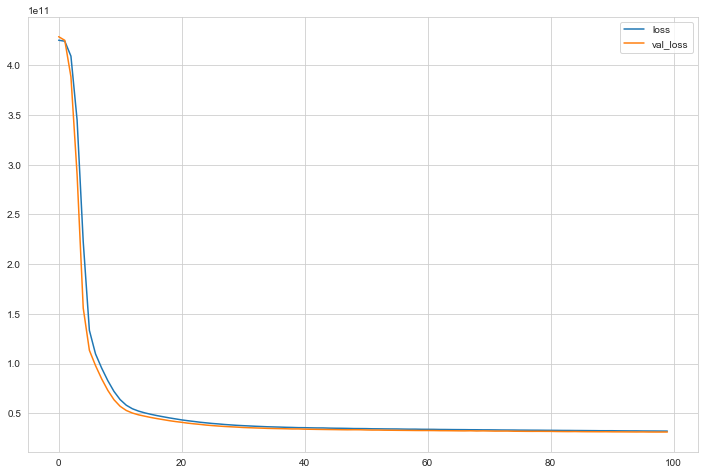

In [27]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [53]:
y_pred_nn = model.predict(X_test)

In [54]:
df_nn = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred_nn.ravel()})
df_nn = df_nn.head(10)
df_nn

,Actual,Predicted
0,349950.0,418107.000000
1,450000.0,656924.750000
2,635000.0,523246.062500
3,355500.0,342974.406250
4,246950.0,318966.000000
5,406550.0,480965.500000
6,350000.0,433842.187500
7,226500.0,218608.984375
8,265000.0,290281.250000
9,656000.0,468089.375000


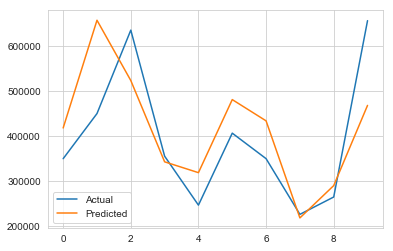

In [57]:
df_nn.plot()

In [58]:
y_pred_nn = model.predict(X_test)
from sklearn import metrics

#print("Train Accuracy Score {:.2f}".format(model.score(X_train,y_train)))
#print("Test Accuracy Score {:.2f}".format(model.score(X_test, y_test)))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_nn)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_nn)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_nn))))

Mean Absolute Error: 109362.90
Mean Squared Error: 31262207922.97
Root Mean Squared Error: 176811.22


## Method3: Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=200, random_state=0)

rf_regressor.fit(X_train, y_train)



RandomForestRegressor(n_estimators=200, random_state=0)

In [62]:
y_pred_forest = rf_regressor.predict(X_test)
df_forest = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_forest})
df_forest = df_forest.head(10)
df_forest

,Actual,Predicted
0,349950.0,299291.475000
1,450000.0,461434.180000
2,635000.0,748791.625000
3,355500.0,395261.415000
4,246950.0,257595.070000
5,406550.0,590966.445000
6,350000.0,402379.580000
7,226500.0,233181.735000
8,265000.0,282833.476667
9,656000.0,643639.150000


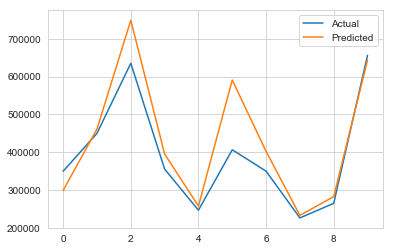

In [63]:
df_forest.plot()

In [64]:
y_pred_forest = rf_regressor.predict(X_test)
from sklearn import metrics

print("Train Accuracy Score {:.2f}".format(rf_regressor.score(X_train,y_train)))
print("Test Accuracy Score {:.2f}".format(rf_regressor.score(X_test, y_test)))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_forest)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_forest)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest))))

Train Accuracy Score 0.98
Test Accuracy Score 0.88
Mean Absolute Error: 70002.04
Mean Squared Error: 17007730834.44
Root Mean Squared Error: 130413.69


In [65]:
print('Model: Linear Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_lr)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_lr)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))))
print('*********************************\n')
print('Model: Neural Network\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_nn))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_nn)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_nn))))
print('*********************************\n')
print('Model: Random Forest\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_forest))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_forest)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest))))


Model: Linear Regression

Mean Absolute Error(MAE): 126523.62
Mean Squared Error(MSE): 40829932237.92
Root Mean Squared Error(RMSE): 202064.18
*********************************

Model: Neural Network

Mean Absolute Error(MAE): 109362.90
Mean Squared Error(MSE):31262207922.97
Root Mean Squared Error(RMSE):176811.22
*********************************

Model: Random Forest

Mean Absolute Error(MAE): 70002.04
Mean Squared Error(MSE):17007730834.44
Root Mean Squared Error(RMSE):130413.69
